# **Customer Churn Prediction**


### **Task 1 - Loading our data**

Installing the pyspark using pip

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pyspark

Importing Modules

In [ ]:
# importing spark session
from pyspark.sql import SparkSession

# data visualization modules
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# pandas module
import pandas as pd

# pyspark SQL functions
from pyspark.sql.functions import col, when, count, udf

# pyspark data preprocessing modules
from pyspark.ml.feature import Imputer, StringIndexer, VectorAssembler, StandardScaler, OneHotEncoder

# pyspark data modeling and model evaluation modules
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator


Building our Spark Session

In [ ]:
spark = SparkSession.builder.appName("Customer_Churn_Prediction").getOrCreate()
spark

Loading our data

In [ ]:
path = '/content/drive/MyDrive/dats/dataset.csv'
data = spark.read.format('csv').option('inferSchema',True).option('header',True).load(path)
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+
|7590-VHVEG|Female|           No|    Yes|        No|     1|  

Print the data schema to check out the data types

In [ ]:
data.printSchema()

root
 |-- customerID: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- SeniorCitizen: string (nullable = true)
 |-- Partner: string (nullable = true)
 |-- Dependents: string (nullable = true)
 |-- tenure: integer (nullable = true)
 |-- PhoneService: string (nullable = true)
 |-- MultipleLines: string (nullable = true)
 |-- InternetService: string (nullable = true)
 |-- OnlineSecurity: string (nullable = true)
 |-- OnlineBackup: string (nullable = true)
 |-- DeviceProtection: string (nullable = true)
 |-- TechSupport: string (nullable = true)
 |-- StreamingTV: string (nullable = true)
 |-- StreamingMovies: string (nullable = true)
 |-- Contract: string (nullable = true)
 |-- PaperlessBilling: string (nullable = true)
 |-- PaymentMethod: string (nullable = true)
 |-- MonthlyCharges: double (nullable = true)
 |-- TotalCharges: double (nullable = true)
 |-- Churn: string (nullable = true)



Get the data dimension

In [ ]:
data.dtypes

[('customerID', 'string'),
 ('gender', 'string'),
 ('SeniorCitizen', 'string'),
 ('Partner', 'string'),
 ('Dependents', 'string'),
 ('tenure', 'int'),
 ('PhoneService', 'string'),
 ('MultipleLines', 'string'),
 ('InternetService', 'string'),
 ('OnlineSecurity', 'string'),
 ('OnlineBackup', 'string'),
 ('DeviceProtection', 'string'),
 ('TechSupport', 'string'),
 ('StreamingTV', 'string'),
 ('StreamingMovies', 'string'),
 ('Contract', 'string'),
 ('PaperlessBilling', 'string'),
 ('PaymentMethod', 'string'),
 ('MonthlyCharges', 'double'),
 ('TotalCharges', 'double'),
 ('Churn', 'string')]

In [ ]:
q0 = (data.count(),len(data.columns))
q0

(7043, 21)

### **Task 2 - Exploratory Data Analysis**
- Distribution Analysis
- Correlation Analysis
- Univariate Analysis
- Finding Missing values

Let's define some lists to store different column names with different data types.

In [ ]:
numerical_columns = [name for name,typ in data.dtypes if typ =="double" or typ == 'int']
categorical_columns = [name for name,typ in data.dtypes if typ =='string']


Let's get all the numerical features and store them into a pandas dataframe.

In [ ]:
df = data.select(numerical_columns).toPandas()
df.head()

,tenure,MonthlyCharges,TotalCharges
0,1,29.85,29.85
1,34,56.95,1889.50
2,2,53.85,108.15
3,45,42.30,1840.75
4,2,70.70,151.65


Let's create histograms to analyse the distribution of our numerical columns.

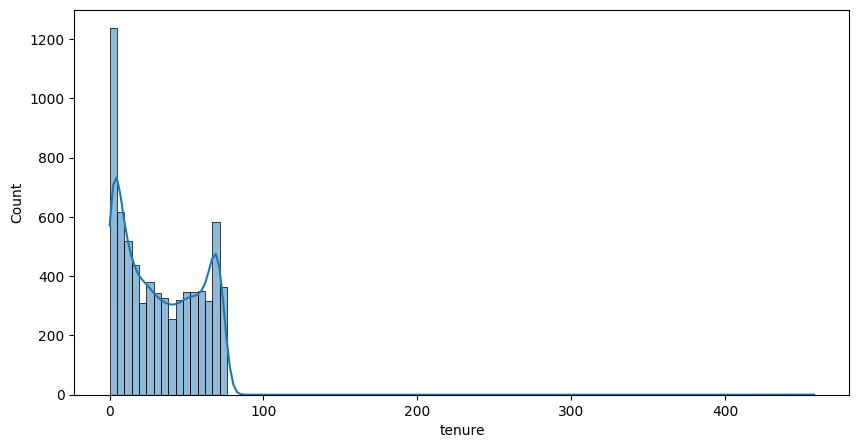

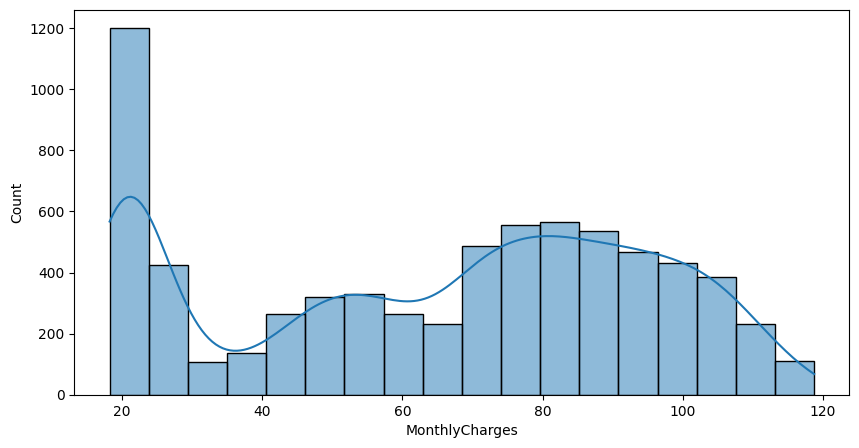

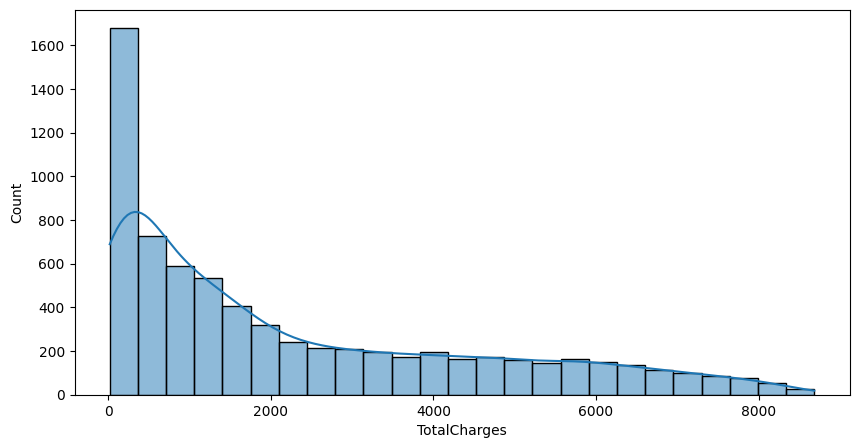

In [ ]:
for col in numerical_columns:
  plt.figure(figsize = (10,5))
  sns.histplot(df[col],kde = True)
  plt.show()

Let's generate the correlation matrix

<ipython-input-15-1a2231d2f686>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax,bins = 20)


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

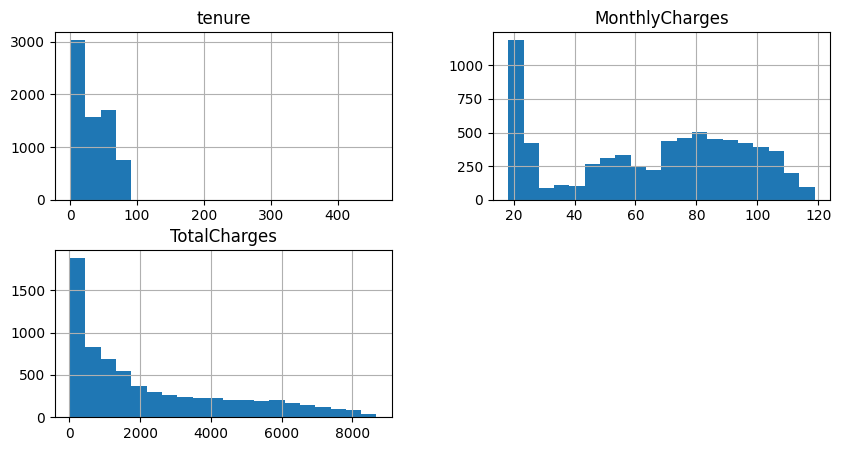

In [ ]:
fig  = plt.figure(figsize=(10,5))
ax = fig.gca()
df.hist(ax=ax,bins = 20)

In [ ]:
df.corr()


,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.243703,0.806530
MonthlyCharges,0.243703,1.000000,0.651065
TotalCharges,0.806530,0.651065,1.000000


Let's check the unique value count per each categorical variables

In [ ]:
for column in categorical_columns:
 data.groupby(column).count().show()

+----------+-----+
|customerID|count|
+----------+-----+
|3668-QPYBK|    1|
|6234-RAAPL|    1|
|1894-IGFSG|    1|
|6982-SSHFK|    1|
|5859-HZYLF|    1|
|6479-OAUSD|    1|
|2592-YKDIF|    1|
|6718-BDGHG|    1|
|3195-TQDZX|    1|
|4248-QPAVC|    1|
|5668-MEISB|    1|
|5802-ADBRC|    1|
|2712-SYWAY|    1|
|2011-TRQYE|    1|
|7244-KXYZN|    1|
|0953-LGOVU|    1|
|3623-FQBOX|    1|
|3692-JHONH|    1|
|3528-HFRIQ|    1|
|7661-CPURM|    1|
+----------+-----+
only showing top 20 rows

+------+-----+
|gender|count|
+------+-----+
|Female| 3488|
|  Male| 3555|
+------+-----+

+-------------+-----+
|SeniorCitizen|count|
+-------------+-----+
|           No| 5901|
|          Yes| 1142|
+-------------+-----+

+-------+-----+
|Partner|count|
+-------+-----+
|     No| 3641|
|    Yes| 3402|
+-------+-----+

+----------+-----+
|Dependents|count|
+----------+-----+
|        No| 4933|
|       Yes| 2110|
+----------+-----+

+------------+-----+
|PhoneService|count|
+------------+-----+
|          No|  682

Let's find number of null values in all of our dataframe columns

In [ ]:
for column in data.columns:
  null_count = data.filter(col(column).isNull()).count()
  print(f"Number of null values in {column}: {null_count}")

Number of null values in customerID: 0
Number of null values in gender: 0
Number of null values in SeniorCitizen: 0
Number of null values in Partner: 0
Number of null values in Dependents: 0
Number of null values in tenure: 0
Number of null values in PhoneService: 0
Number of null values in MultipleLines: 0
Number of null values in InternetService: 0
Number of null values in OnlineSecurity: 0
Number of null values in OnlineBackup: 0
Number of null values in DeviceProtection: 0
Number of null values in TechSupport: 0
Number of null values in StreamingTV: 0
Number of null values in StreamingMovies: 0
Number of null values in Contract: 0
Number of null values in PaperlessBilling: 0
Number of null values in PaymentMethod: 0
Number of null values in MonthlyCharges: 0
Number of null values in TotalCharges: 11
Number of null values in Churn: 0


In [ ]:
for column in data.columns:
  data.select(count(when(col(column).isNull(),"Churn")).alias(column)).show()

+----------+
|customerID|
+----------+
|         0|
+----------+

+------+
|gender|
+------+
|     0|
+------+

+-------------+
|SeniorCitizen|
+-------------+
|            0|
+-------------+

+-------+
|Partner|
+-------+
|      0|
+-------+

+----------+
|Dependents|
+----------+
|         0|
+----------+

+------+
|tenure|
+------+
|     0|
+------+

+------------+
|PhoneService|
+------------+
|           0|
+------------+

+-------------+
|MultipleLines|
+-------------+
|            0|
+-------------+

+---------------+
|InternetService|
+---------------+
|              0|
+---------------+

+--------------+
|OnlineSecurity|
+--------------+
|             0|
+--------------+

+------------+
|OnlineBackup|
+------------+
|           0|
+------------+

+----------------+
|DeviceProtection|
+----------------+
|               0|
+----------------+

+-----------+
|TechSupport|
+-----------+
|          0|
+-----------+

+-----------+
|StreamingTV|
+-----------+
|          0|
+----------

### **Task 3 - Data Preprocessing**
- Handling the missing values
- Removing the outliers

**Handling the missing values** <br>
Let's create a list of column names with missing values

In [ ]:
miss_val_col = ['TotalCharges']

Creating our Imputer

In [ ]:
imputer = Imputer(inputCols=miss_val_col,outputCols=miss_val_col).setStrategy("mean")

Use Imputer to fill the missing values

In [ ]:
imputer = imputer.fit(data)
data = imputer.transform(data)

Let's check the missing value counts again

In [ ]:
data.filter(col('TotalCharges').isNull()).count()

0

**Removing the outliers** <br>
Let's find the customer with the tenure higher than 100

In [ ]:
data.filter(col('tenure')>100).show()

+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|MultipleLines|InternetService|OnlineSecurity|OnlineBackup|DeviceProtection|TechSupport|StreamingTV|StreamingMovies|      Contract|PaperlessBilling|   PaymentMethod|MonthlyCharges|TotalCharges|Churn|
+----------+------+-------------+-------+----------+------+------------+-------------+---------------+--------------+------------+----------------+-----------+-----------+---------------+--------------+----------------+----------------+--------------+------------+-----+
|5122-CYFXA|Female|           No|     No|        No|   458|         Yes|           No|            DSL|            No|         Yes|              No|        Yes|        Yes|            Yes|

Let's drop the outlier row

In [ ]:
data = data.filter(col('tenure')<100)


### **Task 4 - Feature Preparation**
- Numerical Features
    - Vector Assembling
    - Numerical Scaling
- Categorical Features
    - String Indexing
    - Vector Assembling

- Combining the numerical and categorical feature vectors




**Feature Preparation - Numerical Features** <br>

`Vector Assembling --> Standard Scaling` <br>

**Vector Assembling** <br>
To apply our machine learning model we need to combine all of our numerical and categorical features into vectors. For now let's create a feature vector for our numerical columns.


In [ ]:
numerical_vector_assembler = VectorAssembler(inputCols=numerical_columns,outputCol='numerical_features')
data = numerical_vector_assembler.transform(data)
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+--------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|  numerical_features|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+--------------------

**Numerical Scaling** <br>
Let's standardize all of our numerical features.

In [ ]:
scaler = StandardScaler(inputCol='numerical_features',outputCol='scaled_numerical_features',withStd = True,withMean = True)
data = scaler.fit(data).transform(data)
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+--------------------+-------------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       PaymentMethod|MonthlyCharges|TotalCharges|Churn|  numerical_features|scaled_numerical_features|
+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn',
 'numerical_features']

**Feature Preperation - Categorical Features** <br>

`String Indexing --> Vector Assembling` <br>

**String Indexing** <br>
We need to convert all the string columns to numeric columns.

In [ ]:
categorical_columns_indexed = [name + '_Indexed' for name in categorical_columns]
categorical_columns_indexed

indexer = StringIndexer(inputCols = categorical_columns,outputCols=categorical_columns_indexed)
data = indexer.fit(data).transform(data)
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+--------------------+-------------------------+------------------+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessBilling|       Payment

In [ ]:
categorical_columns_indexed.remove('Churn_Indexed')
categorical_columns_indexed.remove('customerID_Indexed')


Let's combine all of our categorifal features in to one feature vector.

In [ ]:
categorical_vector_assembler = VectorAssembler(inputCols=categorical_columns_indexed,outputCol='categorical_features')
data = categorical_vector_assembler.transform(data)
data.show()

+----------+------+-------------+-------+----------+------+------------+----------------+---------------+-------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------+----------------+--------------------+--------------+------------+-----+--------------------+-------------------------+------------------+--------------+---------------------+---------------+------------------+--------------------+---------------------+-----------------------+----------------------+--------------------+------------------------+-------------------+-------------------+-----------------------+----------------+------------------------+---------------------+-------------+--------------------+
|customerID|gender|SeniorCitizen|Partner|Dependents|tenure|PhoneService|   MultipleLines|InternetService|     OnlineSecurity|       OnlineBackup|   DeviceProtection|        TechSupport|        StreamingTV|    StreamingMovies|      Contract|PaperlessB

Now let's combine categorical and numerical feature vectors.

In [ ]:
final_vector_assembler = VectorAssembler(inputCols=['scaled_numerical_features','categorical_features'],outputCol='final_feature_vector')
data = final_vector_assembler.transform(data)
data.select(['final_feature_vector','Churn_Indexed']).show()

+--------------------+-------------+
|final_feature_vector|Churn_Indexed|
+--------------------+-------------+
|(19,[0,1,2,3,5,7,...|          0.0|
|(19,[0,1,2,9,10,1...|          0.0|
|(19,[0,1,2,9,10,1...|          1.0|
|[0.51406079695460...|          0.0|
|(19,[0,1,2,3],[-1...|          1.0|
|(19,[0,1,2,3,8,12...|          1.0|
|(19,[0,1,2,6,8,11...|          0.0|
|(19,[0,1,2,3,7,8,...|          0.0|
|(19,[0,1,2,3,5,8,...|          1.0|
|(19,[0,1,2,6,9,10...|          0.0|
|(19,[0,1,2,5,6,9,...|          0.0|
|[-0.6667820073655...|          0.0|
|(19,[0,1,2,5,8,12...|          0.0|
|(19,[0,1,2,8,11,1...|          1.0|
|(19,[0,1,2,10,12,...|          0.0|
|[1.49131001432301...|          0.0|
|[0.79909181868705...|          0.0|
|[1.57274744910371...|          0.0|
|(19,[0,1,2,3,5,6,...|          1.0|
|(19,[0,1,2,3,11,1...|          0.0|
+--------------------+-------------+
only showing top 20 rows



### **Task 5 - Model Training**
- Train and Test data splitting
- Creating our model
- Training our model
- Make initial predictions using our model

In this task, we are going to start training our model

In [ ]:
train, test = data.randomSplit([0.7,0.3],seed = 100)
print(train.count())
print(test.count())

4930
2112


Now let's create and train our desicion tree

In [ ]:
dt = DecisionTreeClassifier(featuresCol='final_feature_vector',labelCol = "Churn_Indexed",maxDepth=3)
model =  dt.fit(train)

Let's make predictions on our test data

In [ ]:
predictions_test = model.transform(test)
predictions_test.select(["Churn","prediction"]).show()

+-----+----------+
|Churn|prediction|
+-----+----------+
|  Yes|       1.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
+-----+----------+
only showing top 20 rows



### **Task 6 - Model Evaluation**
- Calculating area under the ROC curve for the `test` set
- Calculating area under the ROC curve for the `training` set
- Hyper parameter tuning

In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="Churn_Indexed")
auc_test = evaluator.evaluate(predictions_test, {evaluator.metricName: "areaUnderROC"})
print(f"AUC for test set: {auc_test}")

AUC for test set: 0.7678230877272001


Let's get the AUC for our `training` set

In [ ]:
predictions_train = model.transform(train)
auc_train = evaluator.evaluate(predictions_train, {evaluator.metricName: "areaUnderROC"})
print(f"AUC for training set: {auc_train}")

AUC for training set: 0.7721112330375414


**Hyper parameter tuning**

Let's find the best `maxDepth` parameter for our DT model.

In [ ]:
def evaluate_dt(mode_params):
      test_accuracies = []
      train_accuracies = []

      for maxD in mode_params:
        # train the model based on the maxD
        decision_tree = DecisionTreeClassifier(featuresCol = 'final_feature_vector', labelCol = 'Churn_Indexed', maxDepth = maxD)
        dtModel = decision_tree.fit(train)

        # calculating test error
        predictions_test = dtModel.transform(test)
        evaluator = BinaryClassificationEvaluator(labelCol="Churn_Indexed")
        auc_test = evaluator.evaluate(predictions_test, {evaluator.metricName: "areaUnderROC"})
        # recording the accuracy
        test_accuracies.append(auc_test)

        # calculating training error
        predictions_training = dtModel.transform(train)
        evaluator = BinaryClassificationEvaluator(labelCol="Churn_Indexed")
        auc_training = evaluator.evaluate(predictions_training, {evaluator.metricName: "areaUnderROC"})
        train_accuracies.append(auc_training)

      return(test_accuracies, train_accuracies)

Let's define `params` list to evaluate our model iteratively with differe maxDepth parameter.  

In [ ]:
maxDepths = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
test_accuracies, train_accuracies = evaluate_dt(maxDepths)


Let's visualize our results

In [ ]:
df = pd.DataFrame()
df['maxDepths'] = maxDepths
df['train_accuracies'] = train_accuracies
df['test_accuracies'] = test_accuracies
df.head()

px.line(df,x='maxDepths',y=['train_accuracies','test_accuracies'])

In [ ]:
dt = DecisionTreeClassifier(featuresCol='final_feature_vector',labelCol = "Churn_Indexed",maxDepth=6)
model =  dt.fit(train)

In [ ]:
predictions_test = model.transform(test)
predictions_test.select(["Churn","prediction"]).show()

+-----+----------+
|Churn|prediction|
+-----+----------+
|  Yes|       1.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|  Yes|       1.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|  Yes|       0.0|
|   No|       0.0|
|   No|       1.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
|   No|       0.0|
+-----+----------+
only showing top 20 rows



In [ ]:
evaluator = BinaryClassificationEvaluator(labelCol="Churn_Indexed")
auc_test = evaluator.evaluate(predictions_test, {evaluator.metricName: "areaUnderROC"})
print(f"AUC for test set: {auc_test}")

AUC for test set: 0.7968193482241807


In [ ]:
predictions_train = model.transform(train)
auc_train = evaluator.evaluate(predictions_train, {evaluator.metricName: "areaUnderROC"})
print(f"AUC for training set: {auc_train}")

AUC for training set: 0.7976224624061719


### **7 - Model Deployment**
- Giving Recommendations using our model



We were asked to recommend a solution to reduce the customer churn.


In [ ]:
feature_importance = model.featureImportances
scores = [score for i,score in enumerate(feature_importance)]
scores
df = pd.DataFrame(scores,columns=['score'],index = numerical_columns+categorical_columns_indexed)
px.bar(df,y='score')

Let's create a bar chart to visualize the customer churn per contract type

In [ ]:
df = data.groupby(["Contract","Churn"]).count().toPandas()
px.bar(df,x='Contract',y='count',color='Churn')

The bar chart displays the number of churned customers based on their contract type. It is evident that customers with a "Month-to-month" contract have a higher churn rate compared to those with "One year" or "Two year" contracts. As a recommendation, the telecommunication company could consider offering incentives or discounts to encourage customers with month-to-month contracts to switch to longer-term contracts.